# Hito1: Proyecto Base de datos Covid Ministerio de Ciencias.
En el presente informe, se especifica el trabajo realizado en el dataset sobre covid 19 del ministerio de ciencias, donde se abordará la exploración de datos hecha para este repositorio.

El repositorio consta de 83 Data Products (pueden contener 1 o más tablas), donde cada una especifica cierto tipo de información que se ha extraido de documentos oficiales del gobierno o entidades de salud. El repositorio puede ser encontrado en el siguiente link: [Repositorio del ministerio de ciencias](https://github.com/MinCiencia/Datos-COVID19)



# Introducción 
No es sorpresa que uno de los sucesos históricos que más ha afectado en nuestra época es la pandemia de Covid-19. Esta ha generado la [muerte de más de 2,997,703 personas en todo el mundo](https://www.worldometers.info/coronavirus/?utm_campaign=homeAdUOA?Si) y el encierro de gran parte de la población por no solo días, sino que meses. Dentro de este contexto de incertidumbre, se ha hecho imperiosa la necesidad de entender el virus desde los datos, para así generar políticas de salud acordes y lograr un manejo efectivo de la pandemia. Ya habiendo pasado un año desde el inicio de esta, se puede decir que se conocen mucho mejor los efectos y formas de contagio, pero con el aumento de casos en ciertas localidades, además del descubrimiento de nuevas variantes del virus, el análisis constante de esta enfermedad sigue siendo prioritario no solo para entender como se propaga sino que poder sospechar de la aparición de nuevas cepas que puedan cambiar la situación de medidas sanitarias o incluso afectar el proceso vacunación. 

# Motivación
En el marco del proyecto del curso de Introducción a la minería de datos, se eligió este dataset ya que se cree fehacientemente que el entendimiento del covid desde el data science puede guiar soluciones a problemas que se han generado en distintas partes del mundo. En específico el interés radica en entender la pandemia a nivel nacional, ya que se cree que mediante los datos es posible dar respuesta a problematicas tales como el acelerado aumento de casos que incluso ha llevado de vuelta a varias comunas a cuarentena. En esta linea es necesario poder estudiar en profundidad el comportamiento del virus para así poder entender y analizar tanto políticas sanitarias como otras medidas tomadas por el gobierno. Debido a esto, se espera encontrar patrones que permitan entender que tipo de acciones lleva a que empeore la situación del covid en las distintas regiones, para así, mediante un modelo entender los efectos de distintas varibles importantes como son: movilidad, muertes, contagios diarios, casos activos diarios, casos asintomáticos, entre otros. 

<a href="https://colab.research.google.com/github/rocholaky/Mineria-de-datos-2021/blob/master/Hito1v2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# descargamos el repo en el colab: 
# !git clone https://github.com/rocholaky/Mineria-de-datos-2021
# %cd  Mineria-de-datos-2021

In [2]:
#!git pull

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from utils import dataRetrieval, util_plot
from utils.dataRetrieval import *
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import exploracionRC
import exploracionJO as JO

# Análisis

Para poder realizar un análisis exhaustivo, primero se deben reconocer factores que empíricamente son indices de la evolución de una pandemia. Es por esto que la natalidad, la mortalidad, el transporte y la cantidad de contagios tanto activos como históricos, son piezas de relevancia en el estudio de la propagación y el entendimiento del virus, entre otros factores. Así tambien, el intervalo de tiempo asignado es importante, es por esto que los datos que se muestran a continuación estan situados en su extensa mayoria entre 2019 y la actualidad. Un poco antes y el durante de la pandemia hasta la fecha.

<!-- Inserta algo de texto roberto -->

#### 1.-Data Product 1 - Casos totales por comuna incremental
Lo primero que surgió como duda fue ¿Cual ha sido la región más afectada por la pandemia en términos de cantidad de contagios totales? para esto se graficaron las regiones junto con sus contagios incrementales, como medida de medición se utilizó la densidad poblacional, ya que chile presenta regiones con poblaciones muy dispares. 

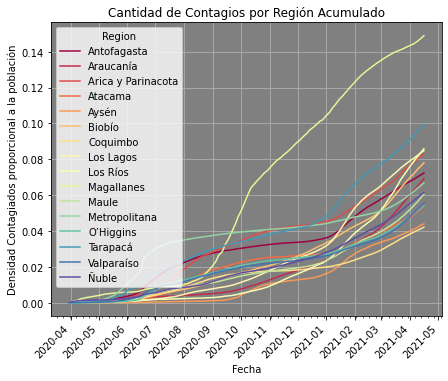

In [2]:
R_population, Dates = exploracionRC.plot_contagios_nacionales()

En este gráfico se puede notar como se han distribuido los contagios en en modo incremental para cada región de chile, en este caso, debido a las diferentes poblaciones de cada región en chile fue necesario normalizar cada región con el valor de su población de manera tal de poder entender y ver de manera más clara las diferencias en la densidad de contagiados a nivel país para cada región. En este caso en específico, podemos ver que la región que está peor en términos de cantidad de población contagiada ha sido los rios, donde cerca del 14% de su población se contagio. Además, en Tarapacá podemos ver que tiene una gran cantidad de contagios, siendo la segunda región que ha sufrido más contagios con cerca de un 10%. 

#### 2.- Contagios totales diarios por región: data product 4. 

In [3]:
Contagios_por_dia, Contagios_q_dias, densidad_contagios_x_dia = exploracionRC.get_densidad_contagios(R_population, Dates)

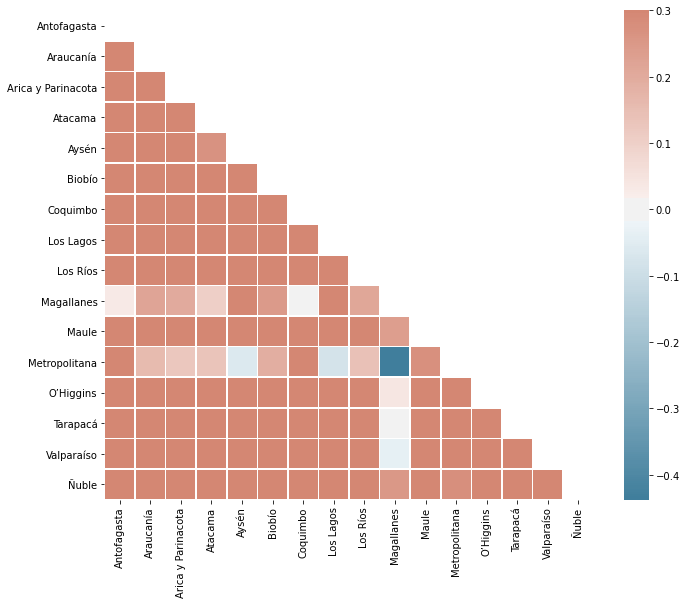

In [4]:
exploracionRC.plot_correlacion_contagios(Contagios_q_dias)

Para el caso de este gráfico se quiso saber si existe algún tipo de correlación entre regiones y sus contagios diarios, donde se puede notar que en la mayoría de los casos la correlación es despreciable, salvo en el caso de la región metropolitana y magallanes, donde podemos ver una correlación de -0.4. Este valor de por sí no es muy alto, pero muestra una pequeña relación entre estas dos regiones. Este análisis también se realizó por ventanas de tiempo, pero no se logró encontrar algún tipo de correlación relevante entre los contagios. 

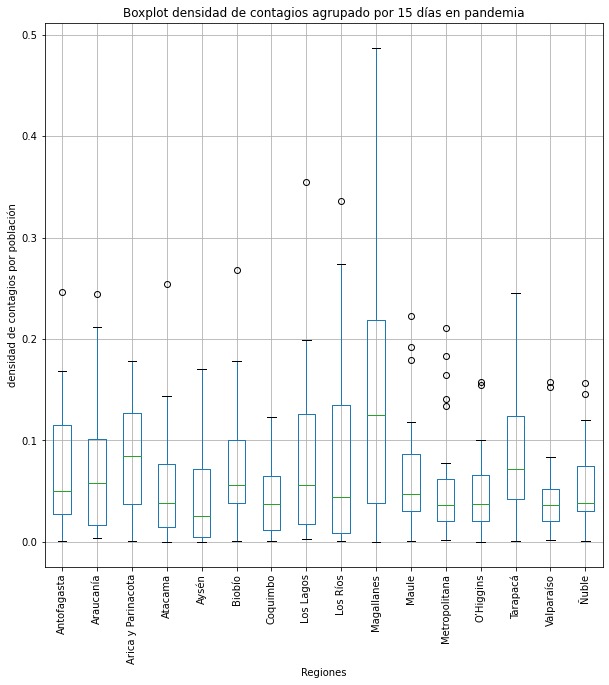

In [5]:
exploracionRC.plot_boxplot_contagios(Contagios_q_dias)

Para este gráfico en específico se trato de ver cuales han sido los las regiones que han presentado una mayor volatilidad en término del número de contagios presentados. Uno pensaría que las regiones con mayor cantidad de personas debiesen tener una mayor volatilidad de contagios. Pero se puede notar que la región metropolitana que es la región más grande de chile tiene una pequeña desviación pero presenta la mayor cantidad de datos outliers. Se ha teorizado que la mayor volatilidad de estas regiones más pequeñas se debe a que muchas de estas han sido foco de vacaciones lo que genera que su población aumente de manera virtual, además al ser localidades más pequeñas muchas veces existe mayor conocimiento entre las personas de la localidad, generando que pueda existir mayor interacción entre ellas y por ende mayores contagios. 

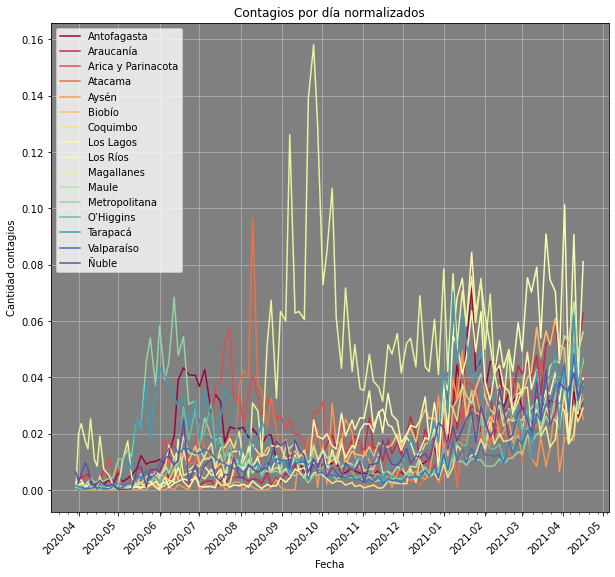

In [6]:
exploracionRC.plot_densidad_contagiados(densidad_contagios_x_dia)

En el presente gráfico, se tienen los contagios de la población a través del tiempo, se puede notar que existe una gran cantidad de volatilidad la cual se debe al efecto que tiene contabilizar todos los días en el conteo de los casos diarios. Para este caso en particular se tiene que los datos están normalizados por la poblaciónd de la región. A modo general se puede notar una tendencia al alza en los primeros meses del año 2021, esto se cree se debe a los permisos de vacaciones entregados por el gobierno aparte de los efectos que tuvo en la población la llegada de las vacunas. Por último, se tiene que la región Metropolitana estuvo con un alto nivel de contagios los días de Julio junto con la región de Tarapacá, estando posteriormente Los Rios en una situación muy complicada los días de Octubre post fiestas patrias. 
Ahora procedemos a ver como se distribuyen estos resultados si se toma en consideración una ventana de 15 días. 

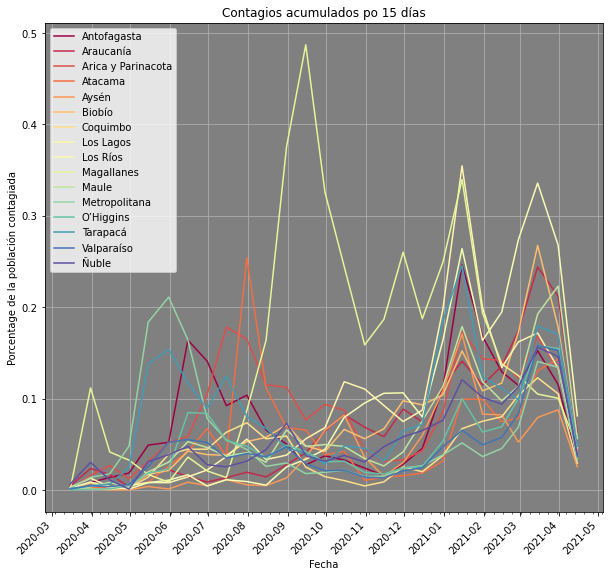

In [7]:
exploracionRC.plot_contagios_q_dia(Contagios_q_dias)

En esta sección se puede ver los resultados de considerar 15 días son mucho menos ruidosos que los que se presentaron en el gráfico anterior. En esta linea se puede resaltar el efecto que tuvo la toma de una ventana de 15 días ( que es el periodo de incubación del virus) en las curvas de contagios. En esta linea, se puede notar que la región de Los Ríos presenta un peak en los meses de septiembre mucho más marcado y además se puede notar un peak en el mes de febrero el cual se presentó en la mayoría de las regiones, en este caso se puede notar con mayor claridad el efecto que tuvo el permiso de vacaciones, esto ya que desde que este se aprobó para las vacaciones entre Diciembre-marzo se puede notar una consatante alza en la mayoría de las regiones en comparación a meses anteriores. 

#### 3.-Data Product 5 - Totales Nacionales Diarios (Modificar todos los  indices)

#### 4.-Data Product 19 - Casos activos por fecha de inicio de síntomas y comuna

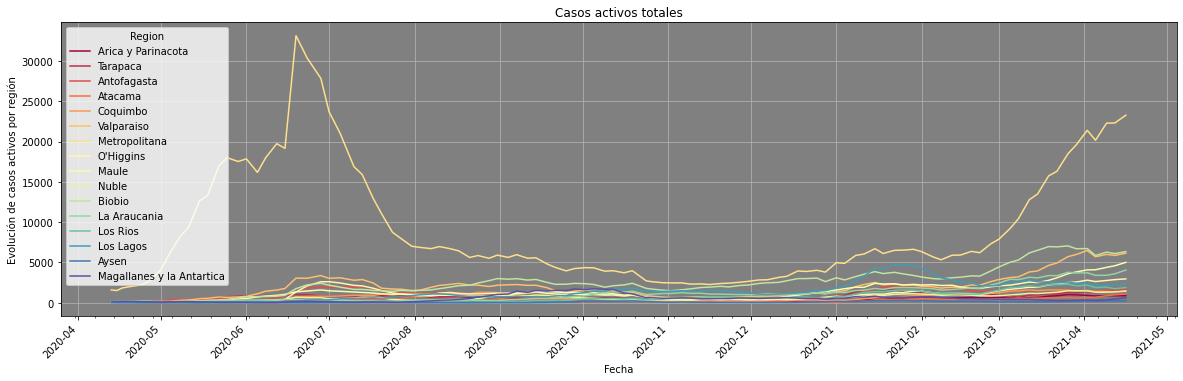

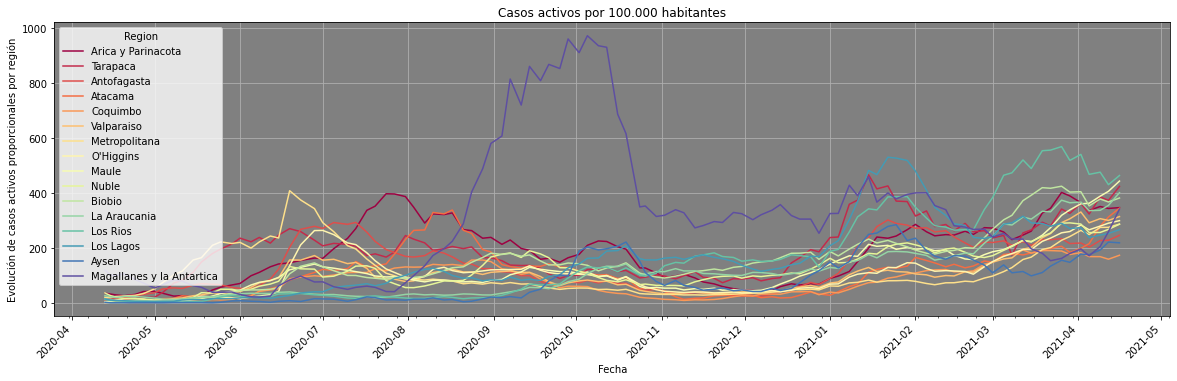

In [8]:
###Data Product 19 - Casos activos por comuna ###
#Cargamos el archivo y filtramos de manera que queden las cantidades que agrupan todas las comunas de una región
activos = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv", delimiter=',')
activos = activos[activos["Comuna"] == "Total"]
activos  = activos.set_index("Region")

#Cambiamos el nombre de una región solo por fines de comodidad en la visualización
activos = activos.rename(index={"Del Libertador General Bernardo O’Higgins":"O'Higgins"})

#Guardamos un dataframe con los valores de población total por región, nos será útil para ver una evolución proporcional
poblacion = activos["Poblacion"]
activos = activos.loc[:, "2020-04-13":]
proporcionalActivos = activos.div(poblacion, axis = 0).transpose()*100000
activos = activos.transpose()

#Graficamos los dataframes
util_plot.plot_timeSeries(activos, "Evolución de casos activos por región", "Casos activos totales", fig_size=(20,6))
util_plot.plot_timeSeries(proporcionalActivos, "Evolución de casos activos proporcionales por región", "Casos activos por 100.000 habitantes", fig_size=(20,6))

En el análisis de casos totales vemos el comportamiento esperado, la región metropolitana se lleva la mayor parte. El caso proporcional nos revela información llamativa: no es la RM si no regiones como Los Lagos y La Araucanía las que tienen una mayor cantidad de casos activos por cantidad de habitantes. En particular el caso de Magallanes llama la atención por dispararse en comparación a las demás regiones. El estudio subsecuente buscará dilucidar las causas de esta anomalía, las que serán útiles para comprender el comportamiento de la propagación y en base a esto diseñar planes más efectivos de control sanitario.

#### 5.-Data Product 27 - Casos nuevos sin síntomas por región

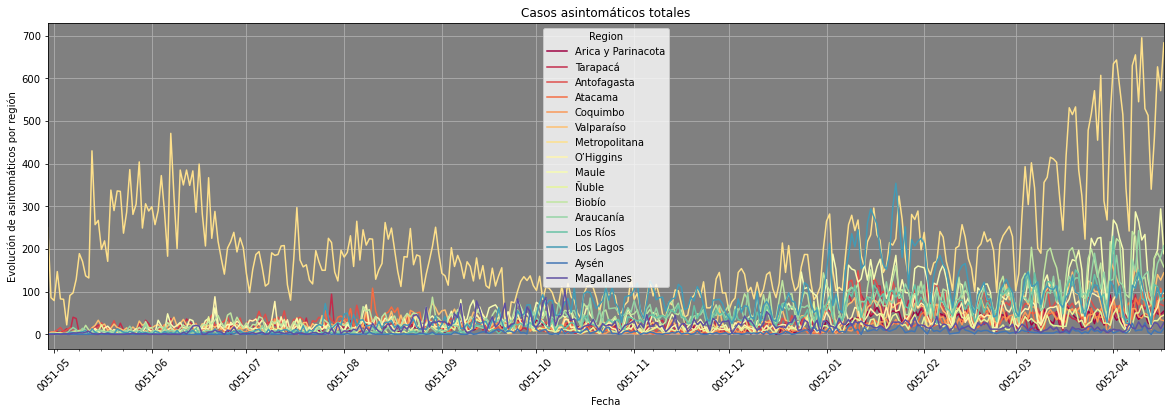

In [9]:
###Data Product 27 - Casos Asintomáticos por región###
asintomaticos = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto27/CasosNuevosSinSintomas.csv", delimiter= ',')
asintomaticos = asintomaticos.set_index("Region")
asintomaticos = asintomaticos.transpose()
asintomaticos = asintomaticos.loc[: , :"Magallanes"]

util_plot.plot_timeSeries(asintomaticos, "Evolución de asintomáticos por región", "Casos asintomáticos totales", fig_size=(20,6))

Se presentan los casos asintomáticos, donde se pueden notar regiones significativamente menos pobladas que la RM presentando comportamientos similares. El estudio de estos sujetos puede suponer otro factor importante en el entendimiento del virus y su propagación: la hipótesis es que al no manifestar los síntomas puede dar una falsa sensación de seguridad lo que no reduciría la movilidad y termina siendo un vector de tranmisión.

#### 6.-Data Product 36 - Residencias Sanitarias

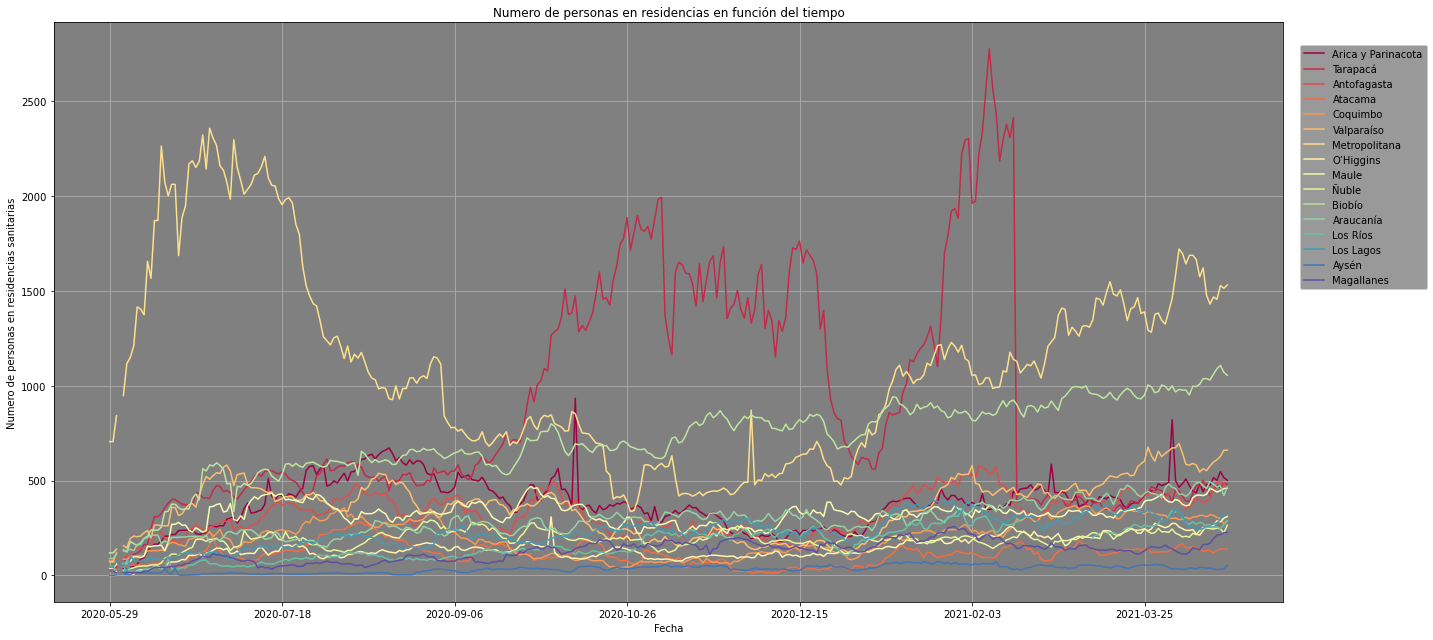

In [10]:
###### Data Product 36 - Residencias Sanitarias ######
rs_x_reg = dataRetrieval.get_residencias()
# eliminamos los cupos totales y residencias:
rs_x_reg.drop(rs_x_reg[rs_x_reg["Categoria"] == "cupos totales"].index, inplace=True)
rs_x_reg.drop(rs_x_reg[rs_x_reg["Categoria"] == "residencias"].index, inplace=True)
#eliminamos la columna categoria
del rs_x_reg["Categoria"]
#seteamos los indices para que sean las regiones
rs_x_reg.set_index("Region", inplace=True)
#transponemos el dataframe
rs_x_reg=rs_x_reg.transpose()
#Ploteaos la serie de tiempo y su boxplot.
util_plot.plot_df(rs_x_reg, "Numero de personas en residencias en función del tiempo", "Numero de personas en residencias sanitarias", size = (20,9))
#Obs: Según lo observado, puede ser conveniente normalizar los datos respecto al 
#volumen poblacional con alguna métrica.

Otra variable que quizás pueda en principio ser ignorada, viene a la mente como un posible factor de medición de crecimiento del virus, o tambien como una medida de miedo o necesidad de protección a cercanos que son factor de riesgo. Las residencias sanitarias permiten a quienes se encuentran con PCR positivo, tener estadía aislados de sus cercanos y prevenir el contagio. Es por esto que no esta demás considerar esta variable dentro del pool utilizado para el modelo final.

En el gráfico anterior, es posible ver a la región Metropolitana como la principal precursora de residencias sanitarias al comienzo de la pandemia, como una posible consecuencia del alto numero de casos activos entre los meses de Mayo y Julio del 2020 en esta región, pero no se puede dilucidar una explicación clara del porque la region de Tarapacá tambien experimentó un aumento desmedido en la cantidad de residencias sanitarias. Esto podría deberse a algún factor migratorio o porpio del contexto de la región de Tarapacá, cuestiones que deberan ser cuidadosamente analizadas y revisar si existen correlaciones importantes con tal hecho, esta hipótesis primeramente debe ser contrastada con la cantidad de residencias disponibles por región y la razón de la habilitación de estas, se trabajará sobre esto en el hito 2, recopilando la información pertinente.

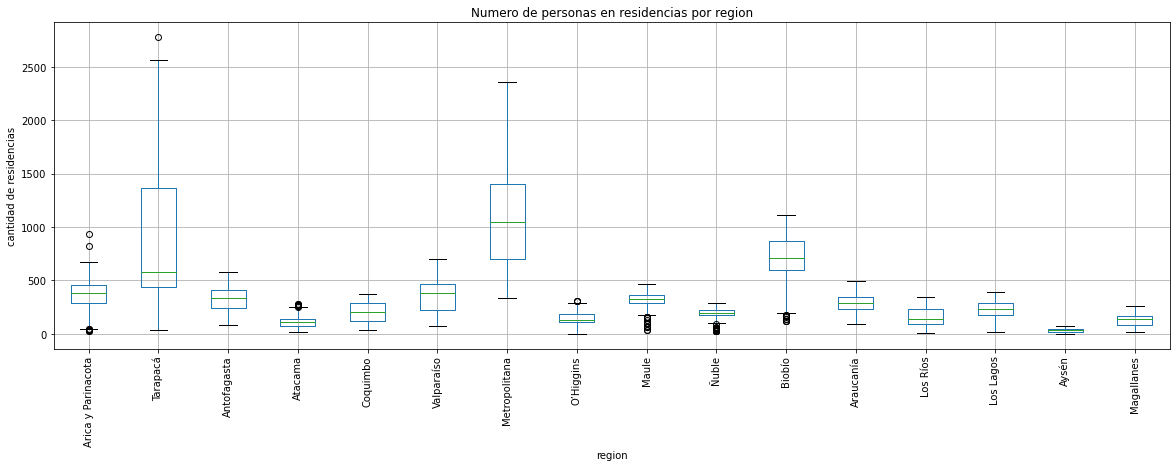

In [11]:
util_plot.box_plot_df(rs_x_reg,"Numero de personas en residencias por region", "region", "cantidad de residencias",size = (20,6))

Este dataset posee distribuciones muy variadas en cuanto a la cantidad de residencias totales ocupadas por región como muestra el boxplot, podemos notar que las mismas regiones que poseían mayor cantidad de residencias ocupadas, para efectos prácticos no presentan valores átipicos. No así como regiones de menor densidad poblacional, como Maule, Ñuble y Biobío, localidades colindantes, lo cual puede dilucidar correlación entre estas regiones por algún aspecto que no solo compartan geógraficamente.

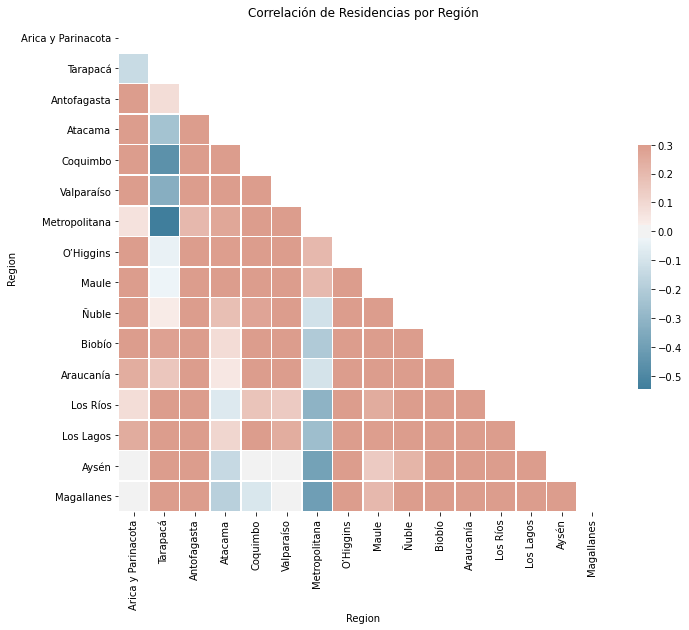

In [12]:
#Resumen estadísistico de residencias por region
rs_x_reg.describe()
util_plot.corr_plot_df(rs_x_reg, "Correlación de Residencias por Región")

Por último se intenta dilucidar si hay una correlación entre las series de tiempo de cada región, lo cual en primera instancia no se condice tanto en las regiones mencionadas con anterioridad, que es alrededor del  0.3, pero podemos notar que si hay mayor correlación lineal inversa entre las regiones Metropolitana y Tarapacá de -0.5, lo cual mediante el gráfico de residencias totales podría deberse a los desfases en que ambos hitos de crecimiento ocurrieron. Para poder determinar si existe causalidad al respecto, debera analizarse un extenso grupo variables y la evolución del resto de series de tiempo a trabajar durante el proyecto.

#### 7.-Data Product 20 - Camas Críticas Disponbles a nivel nacional

In [13]:
camas_criticas_nivel_nacional_traspuesto = get_product20_camas_criticas_nivel_nacional_traspuesto()
camas_criticas_nivel_nacional_traspuesto['Fecha'] = camas_criticas_nivel_nacional_traspuesto['Ventiladores']
del camas_criticas_nivel_nacional_traspuesto['Ventiladores']
camas_criticas_nivel_nacional_traspuesto

,total,disponibles,ocupados,Fecha
0,1550,564,986,2020-04-14
1,1563,577,986,2020-04-15
2,1582,569,1013,2020-04-16
3,1604,579,1025,2020-04-17
4,1627,588,1039,2020-04-18
...,...,...,...,...
365,4272,172,4100,2021-04-14
366,4296,214,4082,2021-04-15
367,4335,198,4137,2021-04-16
368,4357,193,4164,2021-04-17


In [14]:
camas_criticas_nivel_nacional_traspuesto = get_product20_camas_criticas_nivel_nacional_traspuesto()
camas_criticas_nivel_nacional_traspuesto['Fecha'] = camas_criticas_nivel_nacional_traspuesto['Ventiladores']
del camas_criticas_nivel_nacional_traspuesto['Ventiladores']
camas_criticas_nivel_nacional_traspuesto['Fecha'] = pd.to_datetime(camas_criticas_nivel_nacional_traspuesto['Fecha'])
camas_criticas_nivel_nacional_traspuesto.set_index('Fecha', inplace=True)
camas_criticas_nivel_nacional_traspuesto.resample('D')
camas_criticas_nivel_nacional_traspuesto.head()

,total,disponibles,ocupados
Fecha,,,
2020-04-14,1550,564,986
2020-04-15,1563,577,986
2020-04-16,1582,569,1013
2020-04-17,1604,579,1025
2020-04-18,1627,588,1039


In [15]:
camas_criticas_nivel_nacional_traspuesto.describe()

,total,disponibles,ocupados
count,370.000000,370.000000,370.000000
mean,2612.840541,356.081081,2256.697297
std,554.055787,138.902820,620.342505
min,1550.000000,132.000000,986.000000
25%,2196.000000,228.000000,1897.000000
50%,2570.500000,330.500000,2117.000000
75%,2932.500000,482.250000,2592.750000
max,4373.000000,709.000000,4175.000000


In [16]:
camas_criticas_nivel_nacional_traspuesto.corr()

,total,disponibles,ocupados
total,1.000000,-0.380462,0.978331
disponibles,-0.380462,1.000000,-0.563684
ocupados,0.978331,-0.563684,1.000000


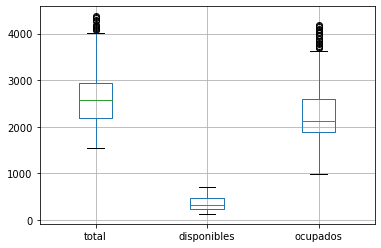

In [17]:
boxplot_camas_criticas_nivel_nacional_traspuesto = camas_criticas_nivel_nacional_traspuesto.boxplot(column=['total', 'disponibles', 'ocupados'])

##### Evolución diaria

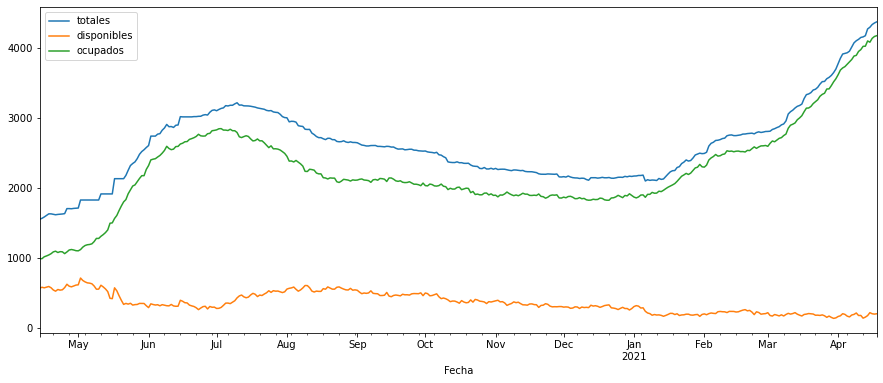

In [18]:
camas_criticas_nivel_nacional_traspuesto['total'].plot(figsize=(15, 6))
camas_criticas_nivel_nacional_traspuesto['disponibles'].plot(figsize=(15, 6))
camas_criticas_nivel_nacional_traspuesto['ocupados'].plot(figsize=(15, 6))

plt.legend(["totales", "disponibles", "ocupados"])
plt.show()

##### Descomposición de datos diarios camas criticas totales.

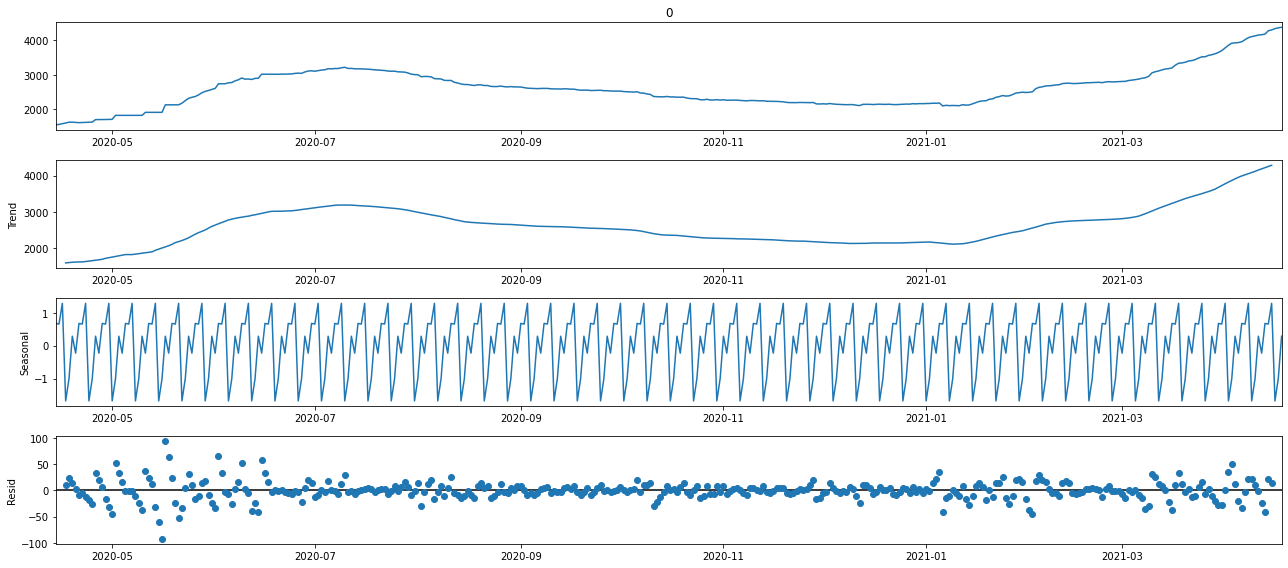

ADF Statistic: -1.5360820228389154
p-value: 0.5155926110554747


count     370.000000
mean     2612.840541
std       554.055787
min      1550.000000
25%      2196.000000
50%      2570.500000
75%      2932.500000
max      4373.000000
Name: 0, dtype: float64

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
camas_criticas_nivel_nacional_traspuesto_total = pd.DataFrame(data=camas_criticas_nivel_nacional_traspuesto['total'].to_numpy(), index=camas_criticas_nivel_nacional_traspuesto.index.to_numpy())[0] 
decomposition_total_diario = sm.tsa.seasonal_decompose(camas_criticas_nivel_nacional_traspuesto_total, model='additive')
fig_total_diario = decomposition_total_diario.plot()
plt.show()

ad_fuller_result_total_diario = adfuller(camas_criticas_nivel_nacional_traspuesto_total)
print(f'ADF Statistic: {ad_fuller_result_total_diario[0]}')
print(f'p-value: {ad_fuller_result_total_diario[1]}')
camas_criticas_nivel_nacional_traspuesto_total.describe()

#### 8.-Data Product 9 - Pacientes COVID-19 en UCI por grupo de edad

In [20]:
pacientes_UCI_por_grupo_etario_traspuesto = get_product9_pacientes_UCI_por_grupo_etario_traspuesto()
pacientes_UCI_por_grupo_etario_traspuesto['Fecha'] = pacientes_UCI_por_grupo_etario_traspuesto['Grupo de edad']
del pacientes_UCI_por_grupo_etario_traspuesto['Grupo de edad']
pacientes_UCI_por_grupo_etario_traspuesto['Fecha'] = pd.to_datetime(pacientes_UCI_por_grupo_etario_traspuesto['Fecha'])
pacientes_UCI_por_grupo_etario_traspuesto.set_index('Fecha', inplace=True)
pacientes_UCI_por_grupo_etario_traspuesto.resample('D')
pacientes_UCI_por_grupo_etario_traspuesto.head()

,<=39,40-49,50-59,60-69,>=70
Fecha,,,,,
2020-04-01,23,23,53,39,35
2020-04-02,23,27,67,46,37
2020-04-03,26,34,74,56,47
2020-04-04,40,36,84,68,52
2020-04-05,40,40,89,75,63


In [21]:
pacientes_UCI_por_grupo_etario_traspuesto.describe()

,<=39,40-49,50-59,60-69,>=70
count,383.000000,383.000000,383.000000,383.000000,383.000000
mean,106.634465,131.798956,299.618799,393.697128,298.156658
std,84.962277,114.674905,200.135467,200.227494,107.587741
min,23.000000,23.000000,53.000000,39.000000,35.000000
25%,50.000000,55.000000,154.500000,237.000000,237.500000
50%,73.000000,94.000000,222.000000,334.000000,287.000000
75%,137.000000,168.500000,395.500000,533.500000,391.500000
max,491.000000,625.000000,1041.000000,811.000000,477.000000


In [22]:
pacientes_UCI_por_grupo_etario_traspuesto.corr()

,<=39,40-49,50-59,60-69,>=70
<=39,1.000000,0.989948,0.964317,0.814822,0.512866
40-49,0.989948,1.000000,0.980632,0.843626,0.530286
50-59,0.964317,0.980632,1.000000,0.922005,0.636486
60-69,0.814822,0.843626,0.922005,1.000000,0.846212
>=70,0.512866,0.530286,0.636486,0.846212,1.000000


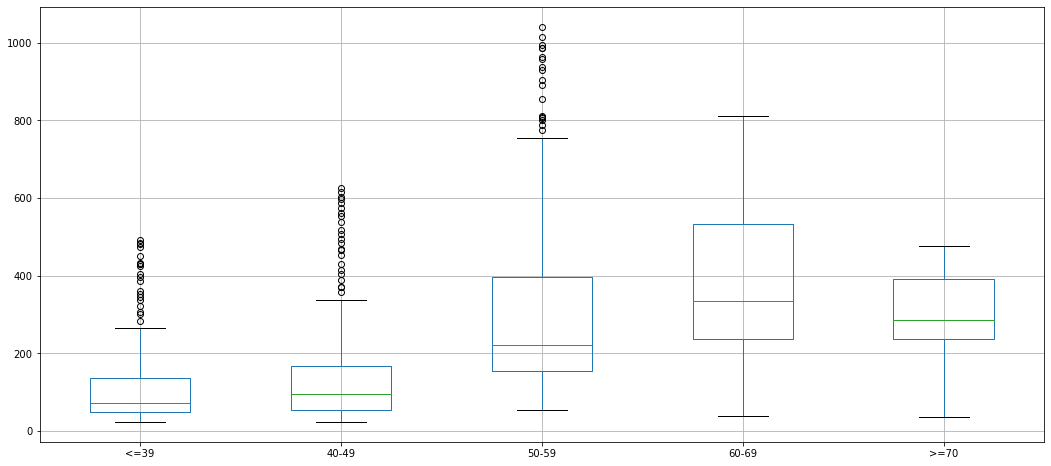

In [23]:
boxplot_pacientes_UCI_por_grupo_etario_traspuesto = pacientes_UCI_por_grupo_etario_traspuesto.boxplot(column=['<=39', '40-49', '50-59', '60-69', '>=70'])

##### Evolución diaria

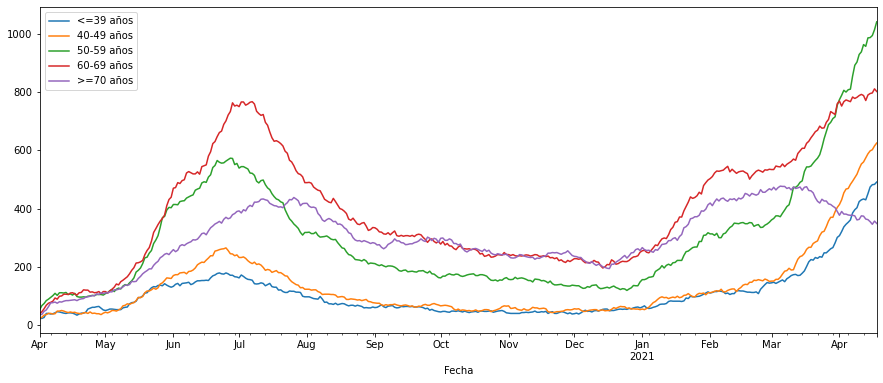

In [24]:
pacientes_UCI_por_grupo_etario_traspuesto['<=39'].plot(figsize=(15, 6))
pacientes_UCI_por_grupo_etario_traspuesto['40-49'].plot(figsize=(15, 6))
pacientes_UCI_por_grupo_etario_traspuesto['50-59'].plot(figsize=(15, 6))
pacientes_UCI_por_grupo_etario_traspuesto['60-69'].plot(figsize=(15, 6))
pacientes_UCI_por_grupo_etario_traspuesto['>=70'].plot(figsize=(15, 6))

plt.legend(["<=39 años", "40-49 años", "50-59 años", "60-69 años", ">=70 años"])
plt.show()

##### Descomposición de datos diarios Pacientes UCI <= 39 años

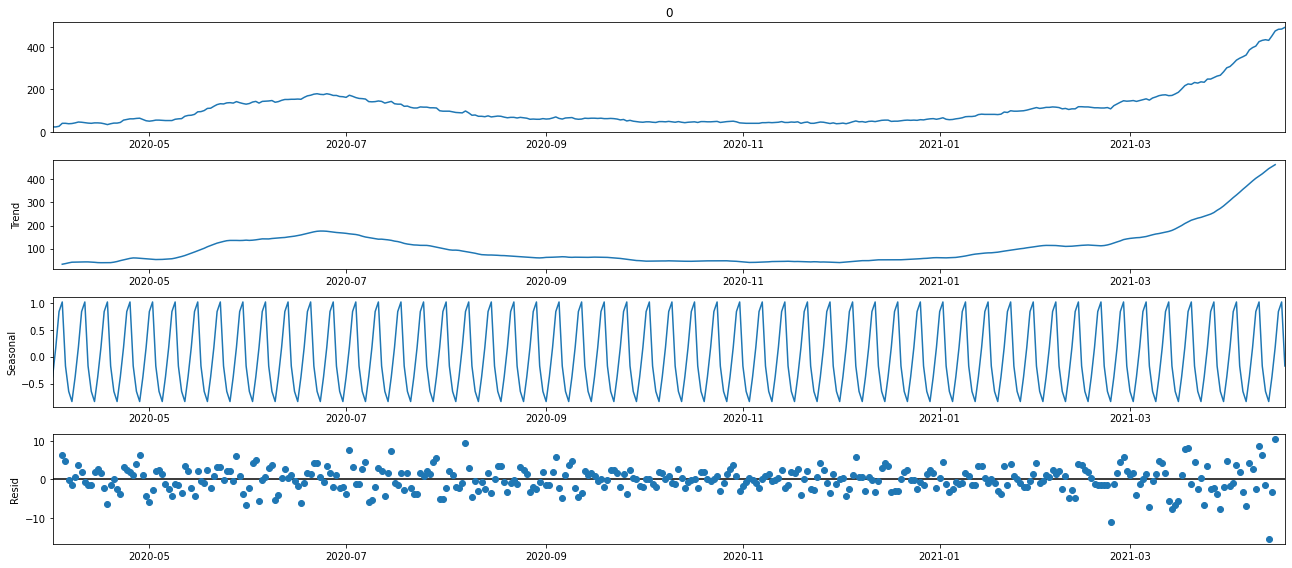

ADF Statistic: 1.7824931218846054
p-value: 0.9983136555668741


count    383.000000
mean     106.634465
std       84.962277
min       23.000000
25%       50.000000
50%       73.000000
75%      137.000000
max      491.000000
Name: 0, dtype: float64

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
pacientes_UCI_por_grupo_etario_traspuesto_39 = pd.DataFrame(data=pacientes_UCI_por_grupo_etario_traspuesto['<=39'].to_numpy(), index=pacientes_UCI_por_grupo_etario_traspuesto.index.to_numpy())[0] 
decomposition_39_diario = sm.tsa.seasonal_decompose(pacientes_UCI_por_grupo_etario_traspuesto_39, model='additive')
fig_39_diario = decomposition_39_diario.plot()
plt.show()

ad_fuller_result_39_diario = adfuller(pacientes_UCI_por_grupo_etario_traspuesto_39)
print(f'ADF Statistic: {ad_fuller_result_39_diario[0]}')
print(f'p-value: {ad_fuller_result_39_diario[1]}')
pacientes_UCI_por_grupo_etario_traspuesto_39.describe()

#### 9.-Data Product 10 - Fallecidos con COVID-19 por grupo de edad

In [26]:
fallecidos_por_grupo_etario_traspuesto = get_product10_fallecidos_por_grupo_etario_traspuesto()
fallecidos_por_grupo_etario_traspuesto['Fecha'] = fallecidos_por_grupo_etario_traspuesto['Grupo de edad']
del fallecidos_por_grupo_etario_traspuesto['Grupo de edad']
fallecidos_por_grupo_etario_traspuesto

,<=39,40-49,50-59,60-69,70-79,80-89,>=90,Fecha
0,2,1,1,9,21,19,4,2020-04-09
1,2,2,2,10,22,21,6,2020-04-10
2,3,2,2,12,24,24,6,2020-04-11
3,3,2,3,12,28,25,7,2020-04-12
4,3,2,3,12,29,26,7,2020-04-13
...,...,...,...,...,...,...,...,...
370,569,852,2454,5088,6905,6339,2341,2021-04-14
371,573,861,2488,5136,6960,6382,2366,2021-04-15
372,577,866,2513,5173,6995,6422,2377,2021-04-16
373,582,875,2530,5203,7032,6449,2384,2021-04-17


In [27]:
fallecidos_por_grupo_etario_traspuesto = get_product10_fallecidos_por_grupo_etario_traspuesto()
fallecidos_por_grupo_etario_traspuesto['Fecha'] = fallecidos_por_grupo_etario_traspuesto['Grupo de edad']
del fallecidos_por_grupo_etario_traspuesto['Grupo de edad']
fallecidos_por_grupo_etario_traspuesto['Fecha'] = pd.to_datetime(fallecidos_por_grupo_etario_traspuesto['Fecha'])
fallecidos_por_grupo_etario_traspuesto.set_index('Fecha', inplace=True)
fallecidos_por_grupo_etario_traspuesto.resample('D')
fallecidos_por_grupo_etario_traspuesto.head()

,<=39,40-49,50-59,60-69,70-79,80-89,>=90
Fecha,,,,,,,
2020-04-09,2,1,1,9,21,19,4
2020-04-10,2,2,2,10,22,21,6
2020-04-11,3,2,2,12,24,24,6
2020-04-12,3,2,3,12,28,25,7
2020-04-13,3,2,3,12,29,26,7


In [28]:
fallecidos_por_grupo_etario_traspuesto.describe()

,<=39,40-49,50-59,60-69,70-79,80-89,>=90
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,277.045333,416.733333,1226.528000,2571.408000,3469.650667,3169.693333,1147.653333
std,163.148486,242.210273,707.751753,1489.018818,2011.721310,1859.785013,688.078758
min,2.000000,1.000000,1.000000,9.000000,21.000000,19.000000,4.000000
25%,142.500000,221.000000,690.000000,1474.500000,1998.000000,1773.500000,630.500000
50%,301.000000,452.000000,1357.000000,2821.000000,3797.000000,3419.000000,1249.000000
75%,393.500000,590.500000,1717.500000,3624.000000,4898.000000,4478.000000,1630.000000
max,594.000000,886.000000,2546.000000,5227.000000,7054.000000,6477.000000,2393.000000


In [29]:
fallecidos_por_grupo_etario_traspuesto.corr()

,<=39,40-49,50-59,60-69,70-79,80-89,>=90
<=39,1.000000,0.999675,0.998883,0.998901,0.999437,0.999410,0.999255
40-49,0.999675,1.000000,0.999270,0.999234,0.999518,0.999310,0.999298
50-59,0.998883,0.999270,1.000000,0.999837,0.999291,0.998530,0.998246
60-69,0.998901,0.999234,0.999837,1.000000,0.999614,0.999036,0.998559
70-79,0.999437,0.999518,0.999291,0.999614,1.000000,0.999775,0.999265
80-89,0.999410,0.999310,0.998530,0.999036,0.999775,1.000000,0.999516
>=90,0.999255,0.999298,0.998246,0.998559,0.999265,0.999516,1.000000


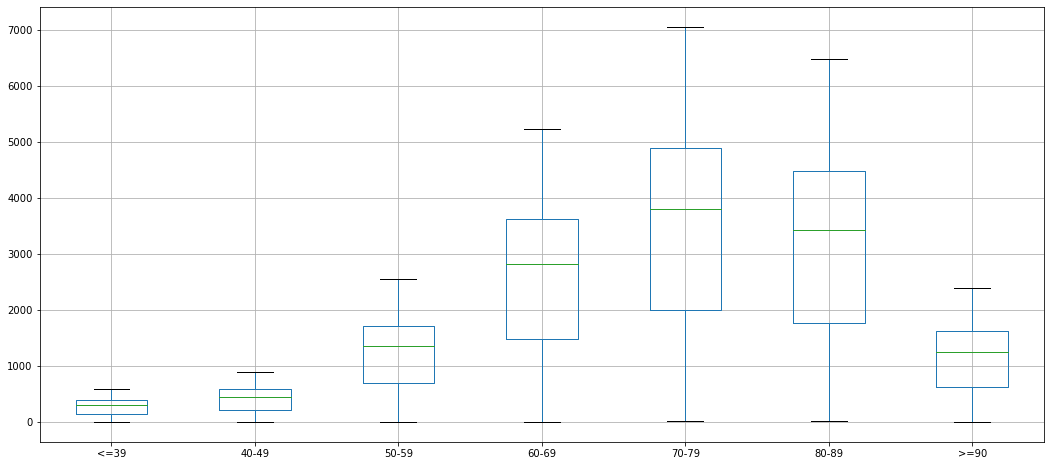

In [30]:
boxplot_fallecidos_por_grupo_etario_traspuesto = fallecidos_por_grupo_etario_traspuesto.boxplot(column=['<=39', '40-49', '50-59', '60-69', '70-79', '80-89', '>=90'])

##### Evolución diaria

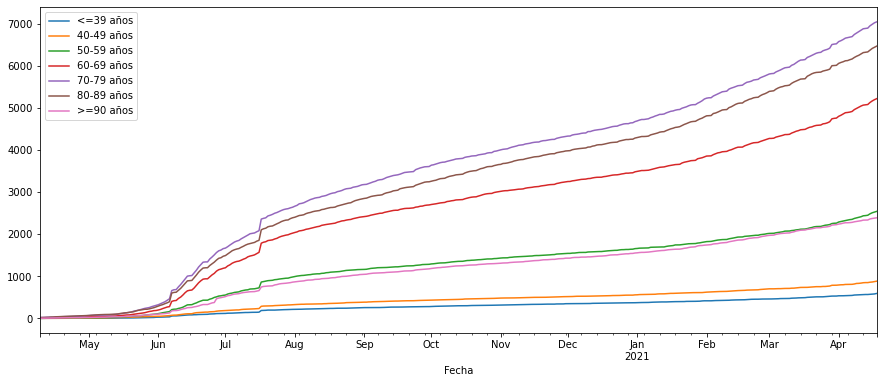

In [31]:
fallecidos_por_grupo_etario_traspuesto['<=39'].plot(figsize=(15, 6))
fallecidos_por_grupo_etario_traspuesto['40-49'].plot(figsize=(15, 6))
fallecidos_por_grupo_etario_traspuesto['50-59'].plot(figsize=(15, 6))
fallecidos_por_grupo_etario_traspuesto['60-69'].plot(figsize=(15, 6))
fallecidos_por_grupo_etario_traspuesto['70-79'].plot(figsize=(15, 6))
fallecidos_por_grupo_etario_traspuesto['80-89'].plot(figsize=(15, 6))
fallecidos_por_grupo_etario_traspuesto['>=90'].plot(figsize=(15, 6))

plt.legend(["<=39 años", "40-49 años", "50-59 años", "60-69 años", "70-79 años", "80-89 años", ">=90 años"])
plt.show()

##### Descomposición de datos diarios fallecidos <= 39 años

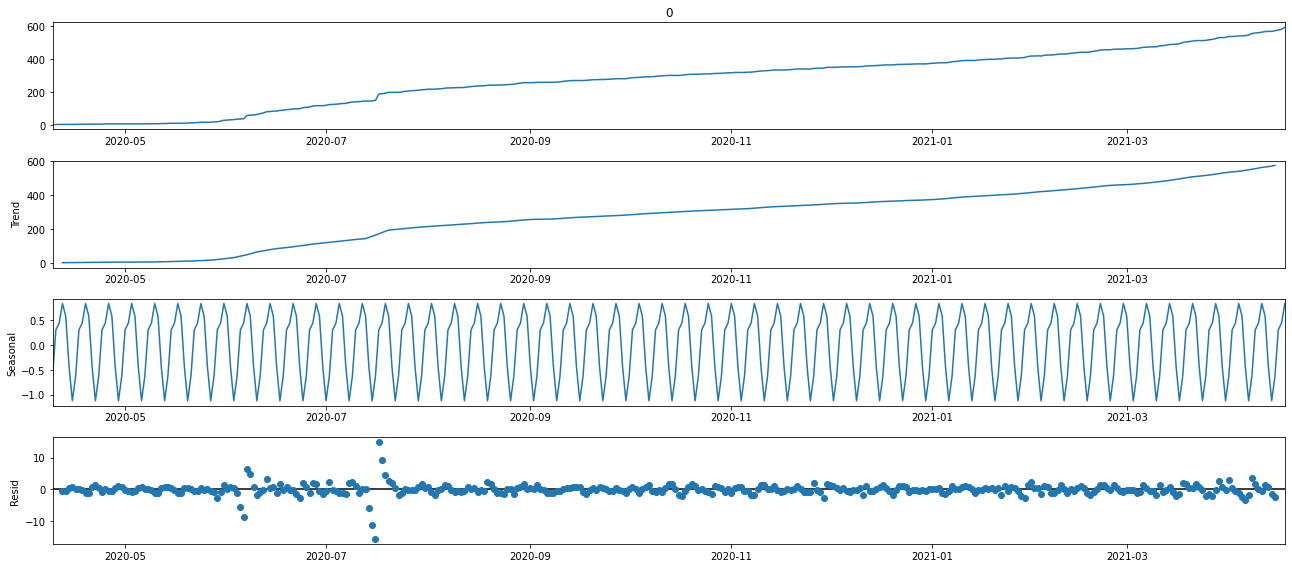

ADF Statistic: 1.7824931218846054
p-value: 0.9983136555668741


count    375.000000
mean     277.045333
std      163.148486
min        2.000000
25%      142.500000
50%      301.000000
75%      393.500000
max      594.000000
Name: 0, dtype: float64

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
fallecidos_por_grupo_etario_traspuesto_39 = pd.DataFrame(data=fallecidos_por_grupo_etario_traspuesto['<=39'].to_numpy(), index=fallecidos_por_grupo_etario_traspuesto.index.to_numpy())[0] 
decomposition_39_diario = sm.tsa.seasonal_decompose(fallecidos_por_grupo_etario_traspuesto_39, model='additive')
fig_39_diario = decomposition_39_diario.plot()
plt.show()

ad_fuller_result_39_diario = adfuller(pacientes_UCI_por_grupo_etario_traspuesto_39)
print(f'ADF Statistic: {ad_fuller_result_39_diario[0]}')
print(f'p-value: {ad_fuller_result_39_diario[1]}')
fallecidos_por_grupo_etario_traspuesto_39.describe()

#### 10.-Data Product 31 - Nacimientos en Chile

Ya se habló sobre los fallecidos con COVID-19 durante la pandemia. Es directo pensar que sucede en su contraparte ¿Como ha evolucionado la natalidad en chile durante la pandemia? Factores de riesgo y situaciones de adversidad, pueden provocar dos efectos bastante plausibles a primera vista ¿Las personas se tenderían a reproducir más para preservar la especie? Una mirada netamente biológica/evolutiva o ¿Las personas realmente se ven sobrepasadas, desmotivadas y/o no creen que valga la pena traer vida al mundo ante tanta adversidad? 

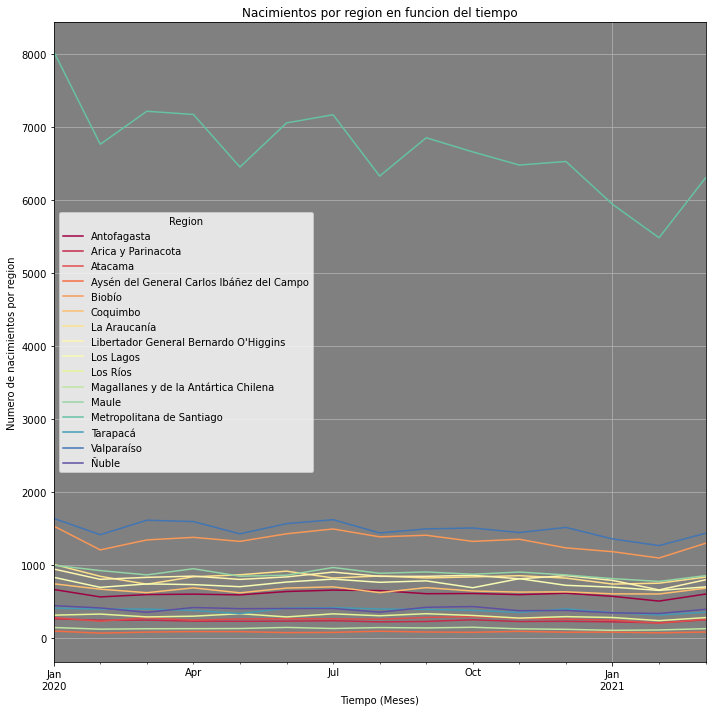

In [62]:
###### Data Product 31 - Nacimientos en Chile #################################
nac_x_reg1 = dataRetrieval.get_nacimientos2020()
nac_x_reg2 = dataRetrieval.get_nacimientos2021()
#print(nacimientos_x_region1)
nac_x_reg1 = nac_x_reg1.drop(["Codigo comuna","Codigo region"], axis=1).groupby("Region").sum().transpose()
nac_x_reg2 = nac_x_reg2.drop(["Codigo comuna","Codigo region"], axis=1).groupby("Region").sum().transpose()
nac_x_reg = pd.concat([nac_x_reg1,nac_x_reg2], axis=0)
# # volvemos los indices a datetime
nac_x_reg.index = pd.to_datetime(list(nac_x_reg.index.values))
#Agrupamos por mes
nac_x_reg=nac_x_reg.resample('M').sum()
#Sacamos el último mes, porque aun no estan completos los datos
nac_x_reg = nac_x_reg.head(-1) #No estan completos los datos del mes actual
#Ploteaos la serie de tiempo y su boxplot.
util_plot.plot_df(nac_x_reg, "Nacimientos por region en funcion del tiempo", "Numero de nacimientos por region" , legend = False, size= (10,10), xlabel = 'Tiempo (Meses)')
#Obs: Al igual que en el análisis de residencias, puede ser conveniente normalizar
#los datos respecto al volumen poblacional con alguna métrica.


Del gráfico sobre Nacimientos por region, se puede dar cuenta de una diferencia de poco más de 5000 nacimientos en promedio entre la región Metropolitana y en el resto de regiones estudiadas, de hecho posee más del doble de la región con más nacimientos que le sigue. 

Respondiendo a las preguntas formuladas, no se puede dejar en claro  o almenos de la información entregada, que haya una tendencia a la baja, ya que solo la región Metropolitana tiende a la baja y de manera aún gradual, habrá que esperar a próximos meses y tener en cuenta la metrica relativa a la densidad poblacional, aunque se cree que este dataset no aporta lo suficiente, aparte de poder responder la pregunta planteada antes de mostrar los resultados.

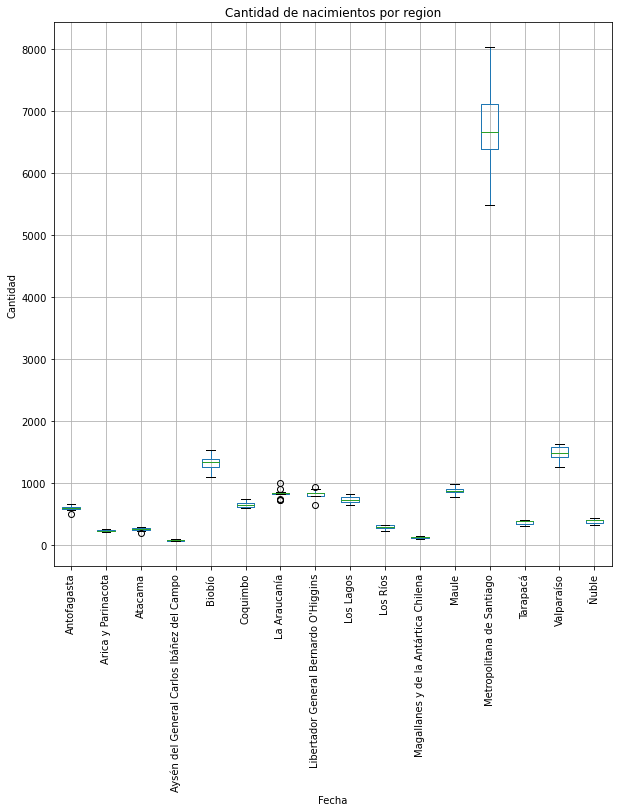

In [44]:
util_plot.box_plot_df(nac_x_reg, "Cantidad de nacimientos por region", "Fecha" , size= (10, 10))

Por último, se puede ver en el boxplot, que la cantidad de nacimientos no tuvo outliers tan considerables en las distintas regiones, pero es posible para el hito 2 y futuros análisis, verificar a que se deben los outliers a pesar de ser redusidos.

#### 11.-Data Product 76 - Avance regional en Campaña de Vacunación COVID-19

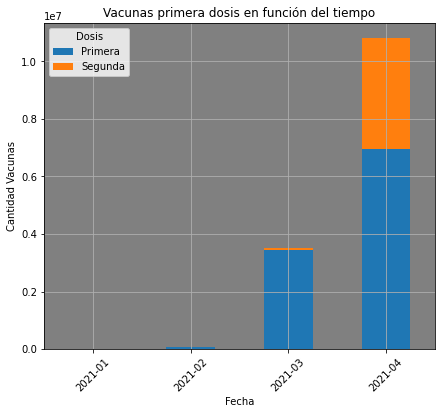

In [35]:
exploracionRC.plot_vacunacion(R_population)

Para el caso de las vacunas, se puede notar claramente el aumento de la vacunación general en los mese de marzo y abril, el efecto de la vacunación de los meses de enero y feberero no se puede notar ya que en comparación a los meses posteriores donde partió la vacunación masiva. Los meses presentes en la vacunación se pueden relacionar con los meses presentados anteriormente en los peaks de contagios mostrando de este modo que podría existir un efecto de "seguridad" que afectó a la población junto con la llegada de las vacaciones. 

#### 12.-Data Product 82 - Movilidad por comuna

In [42]:
###### Data Product 82 - Movilidad por comuna #################################
data_por_region = JO.get_movilidad_data_frames_por_comuna()

for i in range(16):
    util_plot.plot_df(data_por_region[i], "movilidad en la " + str(i + 1) + "-ésima región", "Movilidad", legend = False)

#plot_df(data_frames_por_region[0], "movilidad en " + NUMBER_TO_REGION[1], "Movilidad", legend = False)


TypeError: list indices must be integers or slices, not numpy.float64

In [ ]:
def plot_df2(df, title, ylabel, xlabel = 'Fecha',  size = (20,9), legend = True):
    '''Grafica serie de tiempo de la calidad del aire'''
    fig, ax = plt.subplots(figsize=size)
    ax.set_prop_cycle('color', plt.cm.Spectral(np.linspace(0, 1, len(df.columns))))
        # en el ax ponemos el plot generado con pandas
    ax = df.plot.bar(ax=ax)
    ax.set_facecolor('#808080')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(True)
    
    if legend:
        legend  = plt.legend(bbox_to_anchor=(1.01, 0.97), loc='upper left')
        legend.get_frame().set_facecolor('#808080')
        
    plt.tight_layout()
    plt.show()
    plt.close()
    return

data_estado_por_region = JO.get_estados_por_region()

for i in range(16):
    plot_df2(data_estado_por_region[i], "estado de la " + str(i + 1) + "-ésima región", "Estado", legend = False)

#plot_df(data_frames_por_region[0], "movilidad en " + NUMBER_TO_REGION[1], "Movilidad", legend = False)

Todos están comparados con las primeras dos semanas de marzo. Podemos ver una veloz e inmediata baja de movilidad en todas las regiones, lo que se podría atribuir al inicio de la pandemia. Después de los primeros meses de pandemia la movilidad vuelve a aumentar lentamente hasta inicios de 2021, donde vuelve a bajar. 

Estos datos pueden entregar información sobre la evolución de las medidas sociales y su efectividad sobre el movimiento en comunas en el tiempo.

De todas formas, comparar con las primeras semanas de marzo no es una muy buena decisión dado que es en inicios de clases, lo que podría provocar mayor movimiento durante ese periodo de tiempo (comprar útiles, etc).

Se ven picks interesantes, podemos pensar que en aquellos picks hubo algún tipo de evento en la comuna.

También cabe decir que los aumentos más grandes de movilidad en comunas se dieron para la época de año nuevo y navidad.



A simple vista no podemos obtener información interesantes de los gráficos de la fase en el plan paso a paso por comuna. Solo podríamos indicar las regiones más avanzadas por número de comunas en un paso avanzado.

De todas formas es información relevante para considerar al momento de evaluar las variables del contexto y, claramente, entregará más información al analizarla con más datos.

#### 13.-Data Product 40 - Transporte aéreo de pasajeros semanal 

In [ ]:
###### Data Product 40 - Transporte aéreo de pasajeros semanal #################################

datos = JO.get_transporte_aereo()


# Orígenes
util_plot.plot_df(datos[0], "Pasajeros que dejan la región en función del tiempo (NORTE)", "Salidas por región" , legend = False)

util_plot.plot_df(datos[1], "Pasajeros que dejan la región en función del tiempo (CENTRO)", "Salidas por región" , legend = False)

util_plot.plot_df(datos[2], "Pasajeros que dejan la región en función del tiempo (SUR)", "Salidas por región" , legend = False)

datos_origen = pd.concat([datos[0].transpose(), datos[1].transpose(), datos[2].transpose()]).transpose()


# Destinos
util_plot.plot_df(datos[3], "Pasajeros que viajan a la región en función del tiempo (NORTE)", "Llegadas por región" , legend = False)

util_plot.plot_df(datos[4], "Pasajeros que viajan a la región en función del tiempo (CENTRO)", "Llegadas por región" , legend = False)

util_plot.plot_df(datos[5], "Pasajeros que viajan a la región en función del tiempo (SUR)", "Llegadas por región" , legend = False)

datos_destino = pd.concat([datos[3].transpose(), datos[4].transpose(), datos[5].transpose()]).transpose()

# TODO EL PAÍS
util_plot.plot_df(datos_origen, "Pasajeros que dejan la región en función del tiempo (PAÍS)", "Salidas por región" , legend = False)

util_plot.plot_df(datos_destino, "Pasajeros que viajan a la región en función del tiempo (PAÍS)", "Llegadas por región" , legend = False)


# Barras
util_plot.box_plot_df(datos_origen, "Número de salidas por región (PAÍS)", "Region", "Salidas")
util_plot.box_plot_df(datos_destino, "Número de llegadas por región (PAÍS)", "Region", "Llegadas")


Estos datos en primera instancia se deben tratar con herramientas atingentes a series de tiempo, al igual que el resto y ayudaran a generar los modelos esperados al final del curso de minería de datos.

Extrañamente (o tal vez no tanto) se puede notar que la llegada y salida de personas en una región es casi idéntico. Se observa también que a inicios del año 2020, el número de viajes por región aumenta de forma muy significativa para luego decaer, se cree que puede ser por vacaciones de verano. También se puede ver que en el inicio de la pandemia los viajes disminuyeron de forma significativa pero que desde Junio 2020 han ido en aumento constante, hasta llegar a una bajada, o pick inferior, importante a inicios 2021. Se puede atribuir a las cuarentenas presentes en dicho periodo.

Se presentan puntos particulares en los últimos 2 gráficos. El número de estos y su lejanía con su conjunto puede deberse a semanas de vacaciones.

Puede ser importante ponerlo en relación con los datos de crecimiento de población contagiada por región, de donde se pueden obtener relaciones interesantes.

#### 14.- Data Product 43 - Datos de calidad del aire por hora

Para dar otro paso en la visualización, de la mano a lo que ya vimos sobre el transporte y la movilidad, una variable importante a considera que podría verse afectada y/o afectar a la repercución del virus, es el estado y evolución de la calidad del aire. El material particulado en una habitación puede dificultar la respiración y provocar mayor obstrucción de las vías respiratorias a largo plazo, ó a menor plazo si se posee una enfermedad respiratoria poco predecible, como la frecuentemente generada por el COVID-19, es por esto que cae de cajón revisar como el material particulado de 10 y 2.5 micrometros a cambiado en cada región durante la pandemia. Materiales que son respirables por el ser humano y
[penetran a lo largo de todo el sistema respiratorio hasta los pulmones, produciendo irritaciones e incidiendo en diversas enfermedades.](http://airechile.mma.gob.cl/faq)

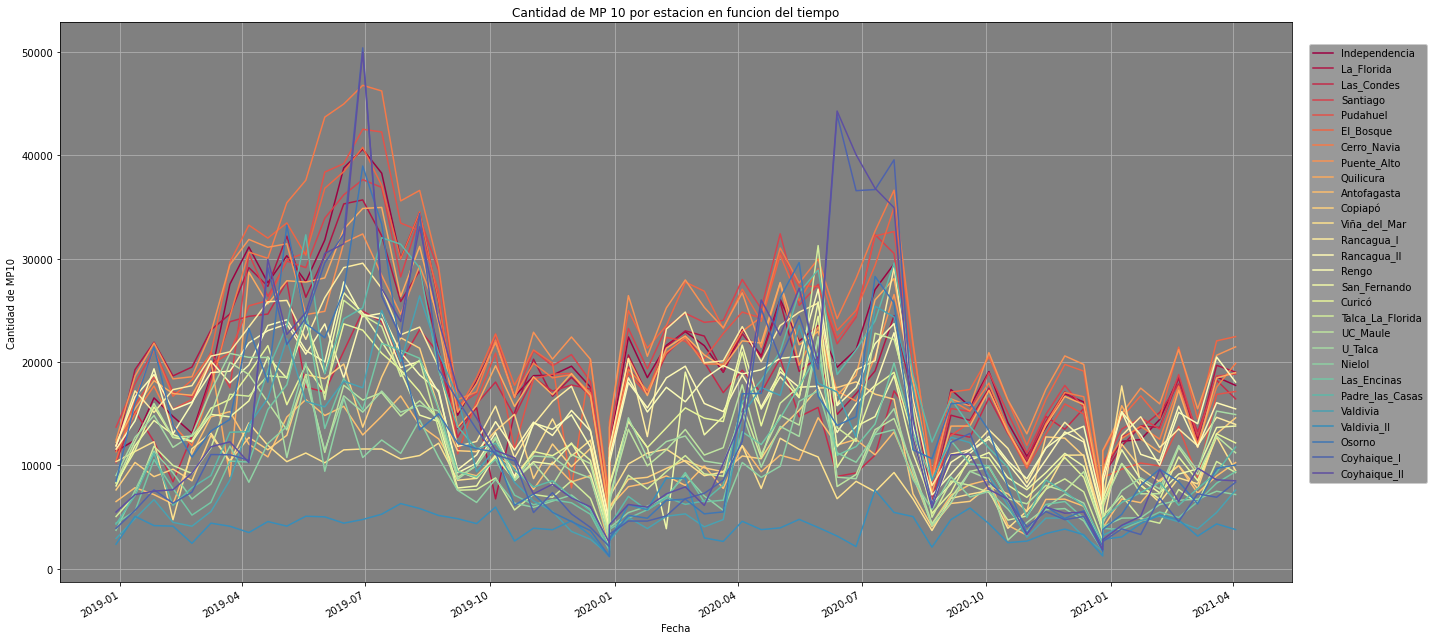

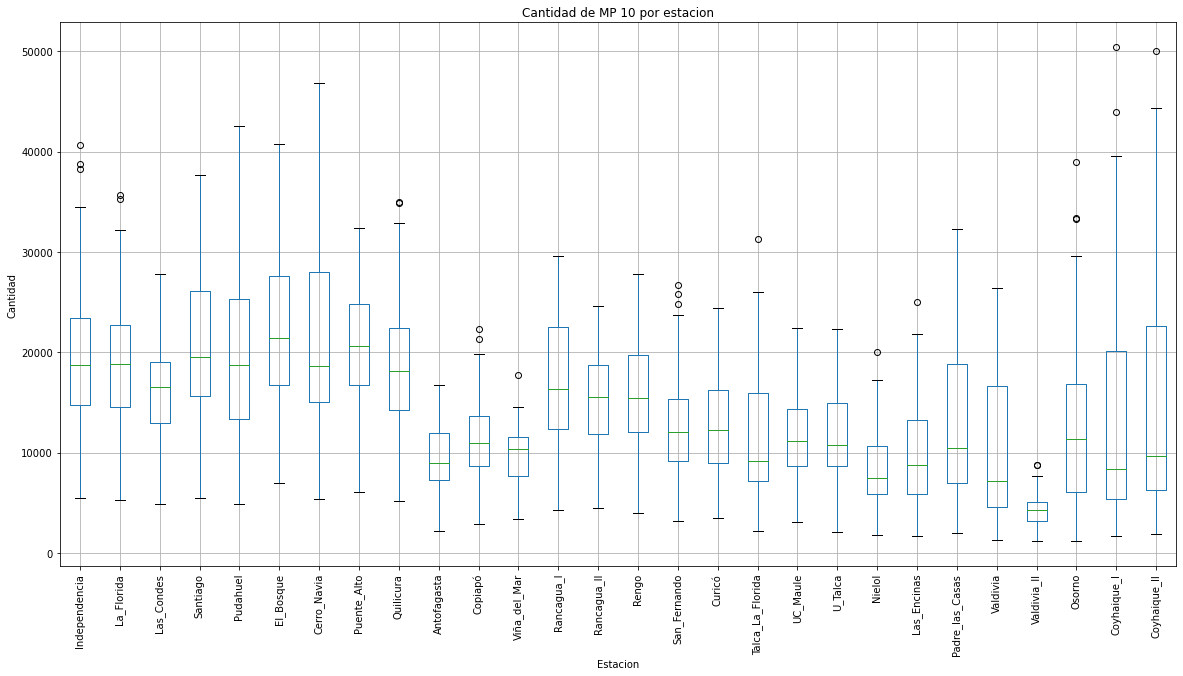

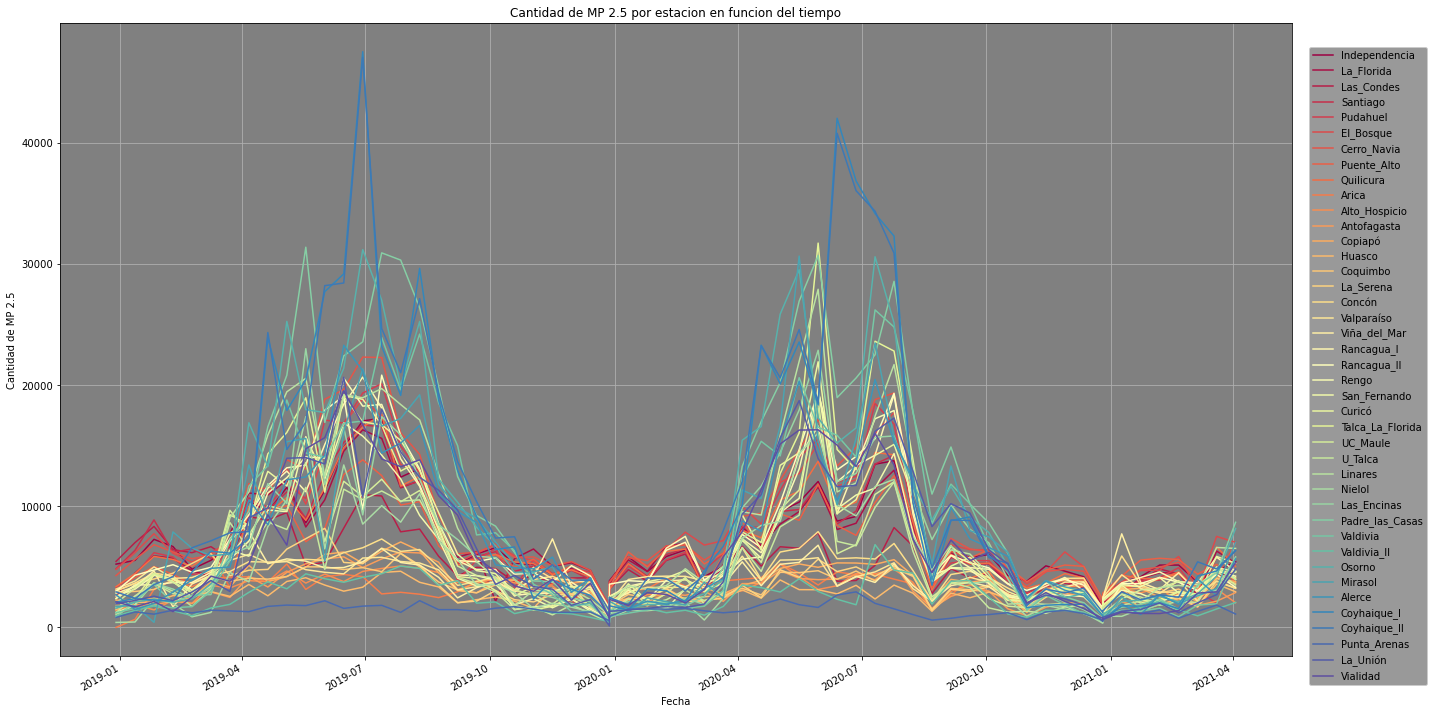

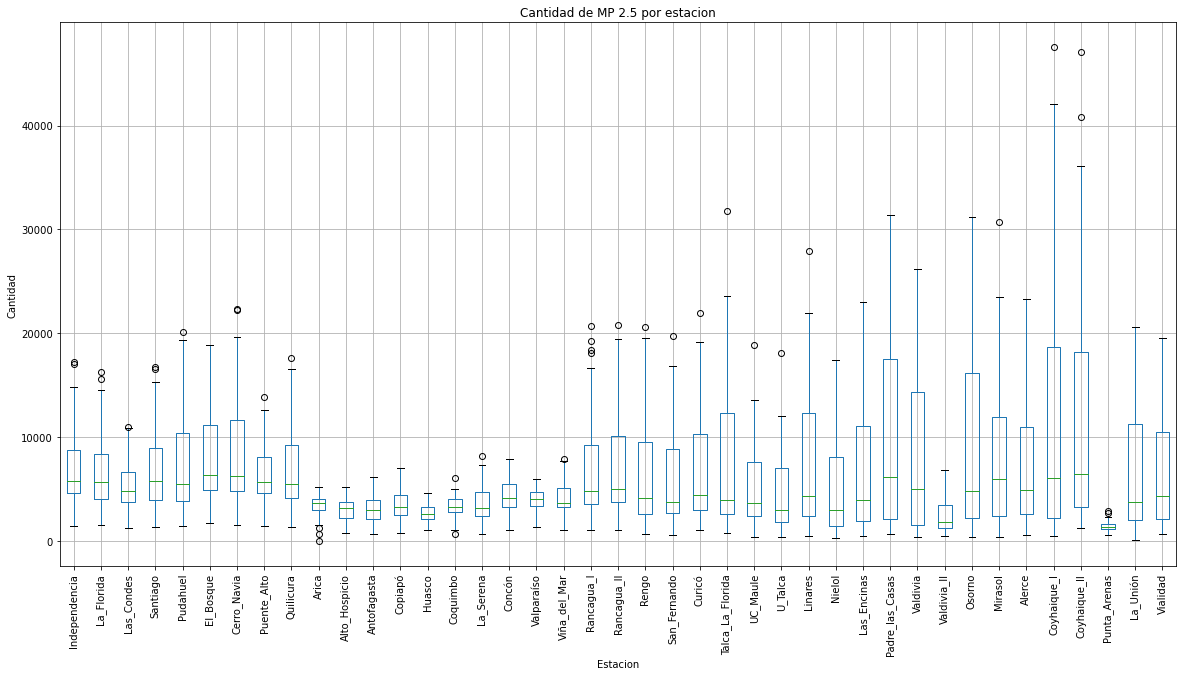

In [43]:
###### Data Product 43 - Datos de calidad del aire por hora #################################
#Se filtran datos agrupando por estación de medición de la contaminación
#Se agrupa cada 2 semanas, durante 2019,2020 y 2021 y del material particulado de 10 y 2.5 micrometros.

####### Caldiad del aire ############################
def calidad_del_aire(mp, anio, intervalo = '2W-SAT'):
    '''Extrae y filtra datos de calidad de aire en MP hasta 2020'''
    MP = dataRetrieval.get_MP(str(mp),str(anio))
    indices = MP['Nombre de estacion']
    MP = MP.drop(['Nombre de estacion', 'Talagante'], axis=1) #No habia suficiente información
    MP.index = indices
    MP = MP.transpose()
    MP = MP.drop(['Codigo region','Region' ,'Comuna','Codigo comuna','UTM_Este','UTM_Norte'], axis=1)
    MP = MP.transpose()
    MP.index = pd.to_datetime(list(MP.index.values))
    MP = MP.astype(float)
    MP = MP.resample( intervalo, closed='left', label='left' ).sum()
    MP.transpose()
    return MP

def calidad_del_aire_nuevo_formato(mp, anio =2021, intervalo = '2W-SAT'):
    '''Extrae y filtra datos de calidad de aire en MP desde esl 2021'''
    MP = dataRetrieval.get_MP(str(mp),str(anio))
    indices = MP['Nombre de estacion']
    MP = MP.drop(['Nombre de estacion','Talagante'], axis=1) #Talagante no tenia información en 2021
    MP.index = indices
    MP.index = pd.to_datetime(list(MP.index.values))
    MP = MP.astype(float)
    MP = MP.resample(intervalo, closed='left', label='left' ).sum()
    return MP

#MP 10 2019-2020-2021
MP = pd.concat([calidad_del_aire(10, 2019),calidad_del_aire(10, 2020)], axis=0)
MP = pd.concat([MP,calidad_del_aire_nuevo_formato(10,2021)], axis=0)
estacion_sin_lectura = MP.columns[MP.isna().any()].tolist()
MP = MP.drop(estacion_sin_lectura, axis = 1)
util_plot.plot_df(MP, 'Cantidad de MP 10 por estacion en funcion del tiempo', 'Cantidad de MP10')
util_plot.box_plot_df(MP, 'Cantidad de MP 10 por estacion', 'Estacion', 'Cantidad')

#MP 2.5 2019-2020-2021
MP2 = pd.concat([calidad_del_aire(2.5, 2019),calidad_del_aire(2.5, 2020)], axis=0)
MP2 = pd.concat([MP2,calidad_del_aire_nuevo_formato(2.5,2021)], axis=0)
estacion_sin_lectura = MP2.columns[MP2.isna().any()].tolist()
MP2 = MP2.drop(estacion_sin_lectura, axis = 1)
util_plot.plot_df(MP2, 'Cantidad de MP 2.5 por estacion en funcion del tiempo', 'Cantidad de MP 2.5',size = (20,11))
util_plot.box_plot_df(MP2, "Cantidad de MP 2.5 por estacion", 'Estacion','Cantidad')

Se puede notar que los datos estan agrupados en intervalos bisemanales, para notar la incidencia del decreto de cuarentenas, que por el momento no se mostrará en el hito 1, por lo complicado de su implmentación al resto de datos, pero por ahora podemos ver pequeños peaks repetitivos en el material particulado de 2.5um y en especial en el de 10um , los cuales a su vez tienen altos peaks en los meses del invierno en Chile, esto se condice bastante con los datos de casos totales activos entre Mayo y Julio, lo cual podría dar un indicio de mayor propagación del virus. 

Un análisis interesante de ver para el próximo hito sera ver como cambió la calidad del aire frente a la pandemia para los distintos materiales particulas y su totalidad, junto al análisis de outliers en tiempos claves de la pandemia en termino de casos, ocupación de camas fallecimientos y el todo el pool de otras variables que se trabajaran.

### Preguntas

##### ¿Están relacionadas las muertes y la calidad del aire en invierno?
Al manifestarse este virus afectando al sistema respiratorio es lógico preguntarse si factores externos inciden en los indice mortalidad. Por esto después de analizar los fallecimientos con COVID-19 por grupo de edad y la calidad de aire segun el material particulado, es posible ver algunas relaciones entre estas variables.

### Problemas

##### ¿Es posible caracterizar mas de un tipo de pandemia en el territorio nacional?
Durante la revisón del dataset, una pregunta que se repite constantemente es: que factores hacen que la pandemia se viva similar tanto en el lugar X como en el lugar Y, por ejemplo, en terminos de casos, fallecimientos y gente internada en camas UCI. ¿Se trata de una zona rural ó urbana?¿Se trata de un sector industrial ó residencial?¿Influye la cantidad de poblacion por km$^2$ del sector?

Estas incognitas nos permitaran analizar la posibilidad de contruir un clasificador para determinar si realmente existen zonas donde se vive distinto la pandemia.


##### ¿Existe alguna relación entre los contagios y la movilidad en los meses de enero-febrero?
Una vez obtenidas varias series de tiempo sobre los contagios y datos especificos sobre movilidad durante la pandemia, cae la pregunta de como el covid se propagó y puede seguir propagandose dado factores externos como las medidas del gobierno y las campañas de vacunación, así también como los viajes aéreos y grandes eventos como las vacaciones o celebraciones nacionales.